In [1]:
dir = '/home/gezi/mine/pikachu/projects/feed/rank/offline/construct_training_data/extract_feature_from_hdfs/data/tfrecord_data_sgsapp_chg_hour/2019092809_24'

In [2]:
import melt

tensorflow_version: 1.14.0
torch_version: 1.2.0
Using TensorFlow backend.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
total = melt.get_num_records(dir)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [4]:
total

39539340

In [5]:
from tqdm.auto import tqdm
from tqdm import tqdm
from tqdm import tqdm as tqdm_base
def tqdm(*args, **kwargs):
    if hasattr(tqdm_base, '_instances'):
        for instance in list(tqdm_base._instances):
            tqdm_base._decr_instances(instance)
    return tqdm_base(*args, **kwargs)

In [6]:
from tfrecord_lite import decode_example
import tensorflow as tf

In [7]:
import gezi

In [8]:
import pandas as pd

In [9]:
records = gezi.list_files(dir)

In [25]:
def decode(it):
    e = decode_example(it)
    x = {}
    x['id'] = e['id'][0].decode()
    x['mid'] = e['mid'][0].decode()
    x['doc_id'] = e['doc_id'][0].decode()
    x['flen'] = len(e['index'])
    x['click'] = e['click'][0]
    x['duration'] = e['duration'][0]
    x['show_time'] = e['show_time'][0]
    x['unlike'] = e['unlike'][0]
    x['num_interests'] = e['num_interests'][0]
    return x

In [26]:
examples = []
total = melt.get_num_records_single(records[0])
for it in tqdm(tf.compat.v1.python_io.tf_record_iterator(records[0]), total=total):
    example = decode(it)
    examples.append(example)

100%|██████████| 1316477/1316477 [01:57<00:00, 11171.55it/s]


In [27]:
d = pd.DataFrame.from_dict(examples)

In [28]:
d.head()

,id,mid,doc_id,flen,click,duration,show_time,unlike,num_interests
0,ea0d869287032935390\t19927j0C2fFyDW,ea0d869287032935390,19927j0C2fFyDW,227,0,0,1569595136,0,114
1,e7ee867473031597223\t19927c0x1hw9cP,e7ee867473031597223,19927c0x1hw9cP,110,0,0,1569616353,0,37
2,8a1b866016037236535\topen_doc_prod10768641,8a1b866016037236535,open_doc_prod10768641,306,0,0,1569558211,0,560
3,c1f4864387020487845\t19726c0C0nkVhN,c1f4864387020487845,19726c0C0nkVhN,39,0,0,1569571321,0,9
4,b151865540047443170\t19925k0l2VYgrp,b151865540047443170,19925k0l2VYgrp,277,0,0,1569552823,0,832


In [39]:
d[d['num_interests'] < 35].groupby('id').size()

id
0000869011023675942\t20190927A0OHDR00         1
0000869011023675942\topen_doc_prod11008439    1
0000869011023675942\topen_doc_prod11038747    1
0000869011023675942\topen_doc_prod11060877    1
0000869240039210853\t19923d0x3WPmEs           1
                                             ..
fffb869140022222552\t1972900x0XZ1zN           1
fffc864469043134446\t1992360x48OC4Z           1
fffc868766020027311\topen_doc_prod10866477    1
fffc868766020027311\topen_doc_prod10960453    1
fffe867218032738973\t1992690p3Dp4hj           1
Length: 152237, dtype: int64

In [40]:
len(d)

1316477

In [41]:
152237 / 1316477

0.11563969594607426

In [120]:
d[d['num_interests'] < 30].groupby('mid').size()

mid
0000869011023675942         3
0000869240039210853         1
00011569560906788|6d386a    2
0001867679021144848         3
0002865256034343287         1
                           ..
fffb868898039473424         3
fffb869140022222552         1
fffc864469043134446         1
fffc868766020027311         2
fffe867218032738973         1
Length: 77937, dtype: int64

In [122]:
d.groupby('mid').size()

mid
00001515938605852|84f743    10
0000358585054882996          1
0000863056041640127         10
0000865856043040657          1
0000869011023675942          4
                            ..
ffff862596034883219          1
ffff866657036119626          2
ffff867478036106243          3
ffff867520048024631          1
ffffA100004C1CA438           2
Length: 554821, dtype: int64

In [121]:
77937 / 554821

0.14047233251805538

In [45]:
d[d['unlike'] == 1].count()

id               101
mid              101
doc_id           101
flen             101
click            101
duration         101
show_time        101
unlike           101
num_interests    101
dtype: int64

In [126]:
x = d[['mid', 'num_interests']].groupby('mid').mean()

In [127]:
%matplotlib inline 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f392ec73470>]],
      dtype=object)

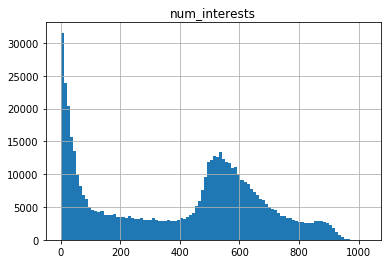

In [128]:
x.hist(bins=100)

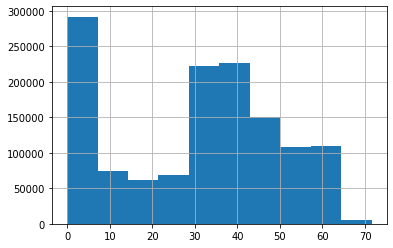

In [142]:
d['num_interests'].apply(lambda x: math.log(x + 1.1) * ((x + 1) / 100)).hist()

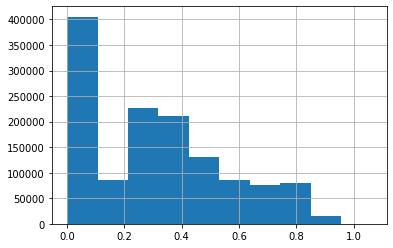

In [144]:
d['num_interests'].apply(lambda x: ((x + 1) / 1000) ** 2).hist()

In [124]:
import math

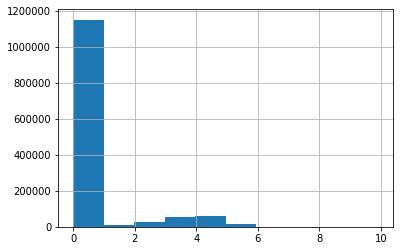

In [125]:
d['duration'].apply(lambda x: math.log(x + 1)).hist()

In [69]:
x = d[d['duration'] > 0]

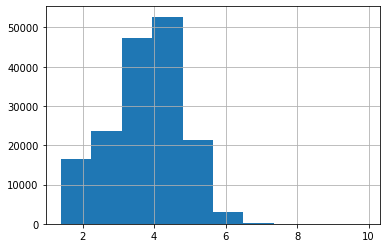

In [70]:
x['duration'].apply(lambda x: math.log(x + 1)).hist()

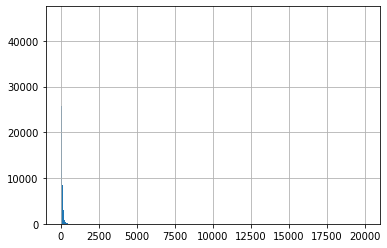

In [72]:
x['duration'].hist(bins=1000)

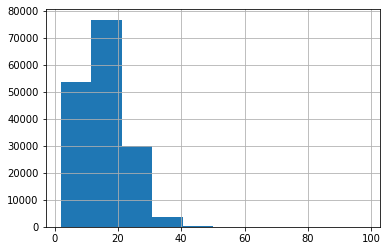

In [73]:
x['duration'].apply(lambda x: math.log(x + 1) ** 2).hist()

In [103]:
valid_dir = '/home/gezi/mine/pikachu/projects/feed/rank/offline/construct_training_data/extract_feature_from_hdfs/data/tfrecord_data_sgsapp_chg_hour/2019092815_1/'

In [104]:
records = gezi.list_files(valid_dir)

In [105]:
examples = []
total = melt.get_num_records_single(records[0])
for it in tqdm(tf.compat.v1.python_io.tf_record_iterator(records[0]), total=total):
    example = decode(it)
    examples.append(example)

100%|██████████| 122206/122206 [00:10<00:00, 11572.92it/s]


In [106]:
d['flen'].mean()

232.5077665618161

In [107]:
vd = pd.DataFrame.from_dict(examples)

In [108]:
vd.head()

,id,mid,doc_id,flen,click,duration,show_time,unlike,num_interests
0,108f861546039526819\topen_doc_prod11077303,108f861546039526819,open_doc_prod11077303,108,0,0,1569652139,0,55
1,c3f2864332043583071\topen_doc_prod10967903,c3f2864332043583071,open_doc_prod10967903,241,0,0,1569656938,0,29
2,6db2A000009A7BDCB1\topen_doc_prod11102125,6db2A000009A7BDCB1,open_doc_prod11102125,228,0,0,1569656132,0,773
3,2079864871041744490\t20190928A06JWA00,2079864871041744490,20190928A06JWA00,103,0,0,1569653654,0,21
4,610d864619045240258\t20190927A0RJHA00,610d864619045240258,20190927A0RJHA00,231,0,0,1569652900,0,580


In [109]:
import time

In [110]:
vd['show_time'].apply(time.localtime)

0         (2019, 9, 28, 14, 28, 59, 5, 271, 0)
1         (2019, 9, 28, 15, 48, 58, 5, 271, 0)
2         (2019, 9, 28, 15, 35, 32, 5, 271, 0)
3         (2019, 9, 28, 14, 54, 14, 5, 271, 0)
4         (2019, 9, 28, 14, 41, 40, 5, 271, 0)
                          ...                 
122201    (2019, 9, 28, 13, 59, 49, 5, 271, 0)
122202    (2019, 9, 28, 15, 41, 31, 5, 271, 0)
122203    (2019, 9, 28, 14, 50, 17, 5, 271, 0)
122204    (2019, 9, 28, 15, 32, 47, 5, 271, 0)
122205     (2019, 9, 28, 15, 53, 1, 5, 271, 0)
Name: show_time, Length: 122206, dtype: object

In [111]:
# TODO 哪些特征field时效性变化最多？
vd['flen'].mean()

199.12771058704155

In [112]:
len(vd)

122206

In [115]:
vd.sort_values(['mid', 'show_time'])

,id,mid,doc_id,flen,click,duration,show_time,unlike,num_interests
10166,00011557708992845|23210d\topen_doc_prod10994737,00011557708992845|23210d,open_doc_prod10994737,242,0,0,1569654474,0,585
14,0001860649043926602\topen_doc_prod10806649,0001860649043926602,open_doc_prod10806649,235,0,0,1569652725,0,518
6518,0001860649043926602\topen_doc_prod10802119,0001860649043926602,open_doc_prod10802119,241,0,0,1569652725,0,518
93655,0002866959037825957\topen_doc_prod10902489,0002866959037825957,open_doc_prod10902489,254,0,0,1569651006,0,513
17295,0002866959037825957\topen_doc_prod11093911,0002866959037825957,open_doc_prod11093911,221,0,0,1569651008,0,513
...,...,...,...,...,...,...,...,...,...
16703,fffd862630030963723\topen_doc_prod11087885,fffd862630030963723,open_doc_prod11087885,232,0,0,1569651612,0,875
99189,fffd862630030963723\t19928e0x0QNUCT,fffd862630030963723,19928e0x0QNUCT,237,0,0,1569654699,0,877
83720,fffd862630030963723\t19928f0l1v8GhS,fffd862630030963723,19928f0l1v8GhS,234,0,0,1569657553,0,879
65917,fffd866937038695991\t20190923A0BKAF00,fffd866937038695991,20190923A0BKAF00,242,0,0,1569652314,0,556


In [118]:
vd[vd['click'] == 1][vd['duration'] < 20].count(0)

id               3593
mid              3593
doc_id           3593
flen             3593
click            3593
duration         3593
show_time        3593
unlike           3593
num_interests    3593
dtype: int64

In [119]:
vd[vd['click']==1]

,id,mid,doc_id,flen,click,duration,show_time,unlike,num_interests
5,6260866955049930215\t19927i0x40LXk1,6260866955049930215,19927i0x40LXk1,223,1,15,1569653310,0,608
16,3b82861533038874093\t19928d0f3Ik7r2,3b82861533038874093,19928d0f3Ik7r2,229,1,31,1569653660,0,938
19,a5ec1569656442684|cd0a8a\t19728m0r1m7Fty,a5ec1569656442684|cd0a8a,19728m0r1m7Fty,38,1,22,1569656461,0,0
20,472b5297cb81cb699fb2f17fd3405b2383c4611634d5\t...,472b5297cb81cb699fb2f17fd3405b2383c4611634d5,19919g0x1BdNzX,252,1,39,1569654650,0,564
27,bc0c860267034022503\t20190923A0FL8Q00,bc0c860267034022503,20190923A0FL8Q00,235,1,92,1569652163,0,436
...,...,...,...,...,...,...,...,...,...
122176,6f60869687046991778\t20190928A08PZJ00,6f60869687046991778,20190928A08PZJ00,232,1,59,1569650694,0,751
122182,6a461567291344110|1b3220\t19925i0x2OAy54,6a461567291344110|1b3220,19925i0x2OAy54,228,1,177,1569651929,0,111
122183,7c6d862350035483839\t19927f0l4ewa4r,7c6d862350035483839,19927f0l4ewa4r,235,1,462,1569652212,0,292
122186,513b862281041705883\topen_doc_prod10842193,513b862281041705883,open_doc_prod10842193,239,1,185,1569655900,0,687
